# IMAGE COMPRESSION USING K-MEANS :-

In [1]:
# working directory
import os
print('Current working directiry: ', os.getcwd())
print('List of files in working directory : ', os.listdir())

Current working directiry:  C:\Users\Santosh Sharma\Desktop\coursera-machine-learning-stanford\K-means-Clustering
List of files in working directory :  ['.ipynb_checkpoints', 'bird_small.png', 'ex7data2.mat', 'Image compression with K-means.ipynb', 'K-means Algorithm.ipynb']


In [2]:
# Import libraries
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
%matplotlib inline

In [4]:
# Read image.
original_img = io.imread('bird_small.png')

# Display
#plt.figure(figsize=(4,4))
#plt.style.use('seaborn-white')
#io.imshow(original_img)

In [5]:
# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.

X = original_img.reshape(original_img.shape[0] * original_img.shape[1], 3)
X = X/255

In [6]:
# Initialize random centroids
def random_centroids(X, k):
    '''
    This function initializes K centroids that are to be used in K-Means on the dataset X
    '''
    # Initialize value
    # no. of row and columns
    m,n = X.shape
    
    # Return 
    centroids = np.zeros(shape = (k, n))
    
    #
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[0:k]]
    
    return centroids

In [7]:
# Find closest centroid
def findClosestCentroids(X, centroids):
    '''
    This function computes the centroid memberships for every example
    '''
    # Initialize values
    k = centroids.shape[0]
    m = X.shape[0]
    #distance = np.zeros(centroids.shape)
    
    # Return
    idx = np.zeros(shape = (m, 1), dtype = int)
    distance = np.zeros(shape = (k,1))
    
    # Compute centroid
    for i in range(m):
        for j in range(k):
            distance[j] = np.sum(np.square(X[i,:] - centroids[j,:]), axis = 0)
        idx[i, :] = np.argmin(distance)
        
    return idx  

In [8]:
def ComputeCentroid(X, idx, k):
    """
    This function returns the new centroids by computing the means of the data points assigned to each centroid.
    """
    # Initialize values
    m, n = X.shape
    
    # Return
    centroid_mean = np.zeros(shape = (k, n))
    
    # Loop over k
    for i in range(k):
        #temp = X[np.squeeze(idx) == i, :]
        #centroid_mean[i-1, :] = np.mean(temp, axis = 0)
        centroid_mean[i, :] =  X[np.squeeze(idx) == i, :].mean(axis = 0)
    return centroid_mean    
        

In [9]:
def train_k_means(X, k, max_iters, print_iteration = False):
    # initialize values
    m, n = X.shape
    centroids = random_centroids(X, k)
    idx = np.zeros(shape = (m,1))
    
    # Run K-Means
    for i in range(max_iters):
        # print if print_iteration is True.
        if print_iteration:
            print('K-Means iteration {:<2} / {}...'.format(i+1, max_iters))
        
        # for each example if x assign it to closest centroid.
        idx = findClosestCentroids(X, centroids)
        
        # Given the membership, compute new centroids.
        centroids = ComputeCentroid(X, idx, k)
      
    return idx,centroids

Running K-Means clustering on pixels from an image...

K-Means iteration 1  / 10...
K-Means iteration 2  / 10...
K-Means iteration 3  / 10...
K-Means iteration 4  / 10...
K-Means iteration 5  / 10...
K-Means iteration 6  / 10...
K-Means iteration 7  / 10...
K-Means iteration 8  / 10...
K-Means iteration 9  / 10...
K-Means iteration 10 / 10...
................
Applying K-Means to compress an image...



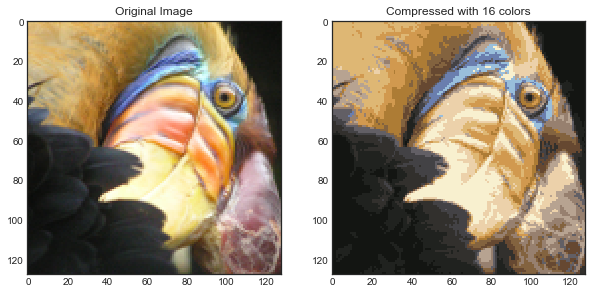

In [10]:
# Apply k-Means on  Bird image.
print('Running K-Means clustering on pixels from an image...\n')
idx, centroids = train_k_means(X, k = 16, max_iters = 10, print_iteration = True)

# Compress image.
x_recovered = centroids[np.squeeze(idx),:]
# Reshape image for display
compressed_img = x_recovered.reshape(original_img.shape[0], original_img.shape[1], 3)

# Display Original and Compressed image.
print('................')
print('Applying K-Means to compress an image...\n')

# Set plot params.
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(10,5))

# Original Image
fig.add_subplot(1,2,1)
plt.imshow(original_img)
plt.title('Original Image');

# Compressed Image
fig.add_subplot(1,2,2)
plt.imshow(compressed_img)
plt.title('Compressed with 16 colors');
